In [ ]:
'''
【项目03】  知乎数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格

'''

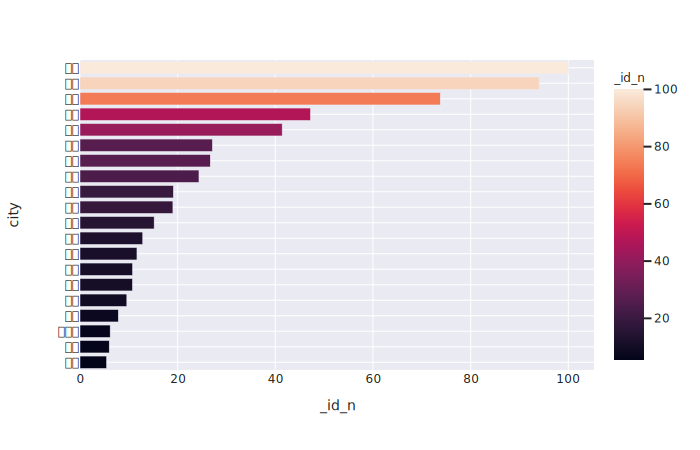

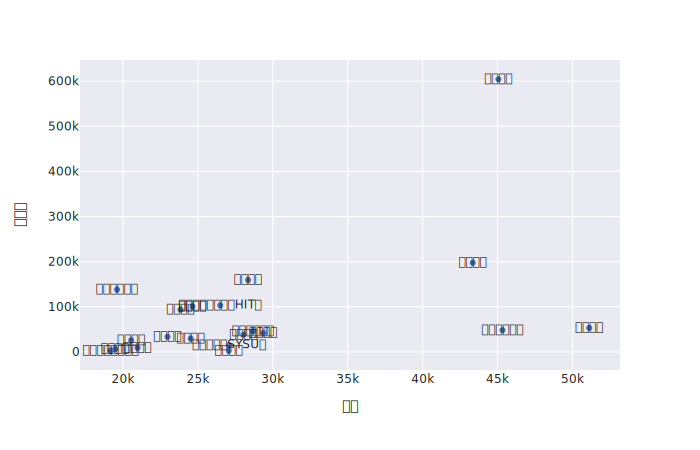

In [4]:
import pandas as pd
import plotly.express as px
zh = pd.read_csv(r'D:\BaiduNetdiskDownload\项目03知乎数据清洗整理和结论研究_资料\知乎数据_201701.csv',engine='python')
dy = pd.read_csv(r'D:\BaiduNetdiskDownload\项目03知乎数据清洗整理和结论研究_资料\六普常住人口数.csv',engine='python')
zh.isnull().sum()

for c in zh.columns:
    if zh[c].dtype=='object':
        zh[c].fillna('缺失数据',inplace=True)
    else: zh[c].fillna(0,inplace=True)
zh.head()
data=zh.groupby('居住地').count()
dy['city']=dy['地区'].str[:-1]
data_1=pd.merge(data,dy,left_index=True,right_on='city',how='inner')[['_id','city','常住人口']]
data_1['知友密度'] =data_1['_id']/data_1['常住人口']
data_1.head()
def data_re(df,*cols):
    df_n=df.copy()
    for col in cols:
        ma = df[col].max()
        mi = df[col].min()
        df_n[col+'_n'] = (df_n[col]-mi)/(ma-mi)*100
    return df_n
result = data_re(data_1,'_id','知友密度')
result.sort_values('_id_n',ascending=False,inplace=True)
result_20 = result.iloc[:20]
fig = px.bar(result_20,x='_id_n',y='city',color='_id_n',template='seaborn')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show(renderer='svg')

xx = zh.groupby('教育经历').sum()[['关注','关注者']].drop(['缺失数据','大学','本科'])
xx.sort_values('关注',inplace=True,ascending=False)
xx_20=xx.iloc[:20].reset_index()
xx.head()
pig = px.scatter(xx_20,x='关注',y='关注者',text='教育经历',template='seaborn')
pig.show(renderer='svg')